<div style="background-color:#0D1B2A; color:white; padding:15px; border-radius:10px;">
  <h1 style="text-align:center;">🏦 Bank Customer Churn Prediction</h1>
  <p style="text-align:center;">Customer Churn Prediction Using Machine Learning</p>
</div>

<div style="
    border-radius: 18px;
    padding: 30px 40px;
    text-align: center;
    background: linear-gradient(135deg, #b8860b, #8b6508);
    color: #fceec7;
    font-family: Arial, sans-serif;
    width: 70%;
    margin: auto;
    box-shadow: 0 4px 18px rgba(0,0,0,0.25);
">

<h1 style="font-size: 36px; margin-bottom: 8px;">Mesut Karagöz</h1>

<h2 style="font-size: 22px; font-weight: 500; margin-top: 0;">
Data Analyst | Data Scientist
</h2>

<div style="margin-top: 25px; display: flex; justify-content: center; gap: 20px;">

  <a href="https://www.linkedin.com/in/mesut-karagöz-181733260/" target="_blank" style="
      text-decoration:none;
      background:#0072b1;
      color:white;
      padding:12px 26px;
      border-radius:10px;
      font-size:17px;
      display:inline-block;">
      LinkedIn
  </a>
  <a href="https://github.com/Mst-KrgZ" target="_blank" style="
      text-decoration:none;
      background:#24292e;
      color:white;
      padding:12px 26px;
      border-radius:10px;
      font-size:17px;
      display:inline-block;">
      GitHub
  </a>

</div>

</div>

<div style="
    border-left: 6px solid #1F6FEB;
    background: #0d1117;
    padding: 20px 25px;
    border-radius: 8px;
    color:white;
    font-family: Arial, sans-serif;
">
    <h2 style="margin-top: 0;">📌 Introduction</h2>
    <p style="font-size: 16px; line-height: 1.6;">
        Customer churn is one of the most critical problems in the banking sector. <br>
        Identifying customers who are likely to leave the bank enables institutions 
        to take proactive measures that improve customer satisfaction and reduce financial losses.
        <br>
        In this project, we use Machine Learning techniques to analyze bank customer data 
        and predict whether a customer will churn (exit) or stay.
    </p>
</div>

<div style="
    border-left: 6px solid #1F6FEB;
    background: #0d1117;
    padding: 20px 25px;
    border-radius: 8px;
    color:white;
    font-family: Arial, sans-serif;
">
    <h2 style="margin-top: 0;">🎯 Project Goals</h2>
    <p style="font-size: 16px; line-height: 1.6;">
- Analyze customer behavior patterns <br>
- Perform Exploratory Data Analysis (EDA)  <br>
- Apply data preprocessing and feature engineering  <br>
- Build multiple ML models (Logistic Regression, Random Forest, XGBoost, CatBoost, SVM, LightGBM, etc.)  <br>
- Compare performance metrics and select the best model <br> 
- Provide actionable insights for reducing churn  
    </p>
</div>

In [1]:
# Data handling
import pandas as pd
import numpy as np
import joblib

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

import shap

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# SMOTE for balancing
from imblearn.over_sampling import SMOTE

# Optional advanced models (çok iyi olur)
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# General settings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


📌 Why These Columns Are Removed?

RowNumber

This column only represents the index position of each row in the dataset.

It does not contain any meaningful information that contributes to predicting churn.

Keeping it would only introduce noise.

CustomerId

Although it uniquely identifies each customer, it does not contain predictive value.

Machine learning models should not learn from arbitrary ID numbers.

Including it may mislead the model by introducing patterns that do not reflect real behavior.

Surname

A customer's last name has no relationship with churn behavior.

It is purely irrelevant and may even inject random noise into the model.

Therefore, removing it increases model clarity and reduces unnecessary dimensionality.

🧠 Summary

Removing irrelevant or non-informative features helps:

Reduce noise in the model

Improve training speed

Increase model accuracy

Prevent overfitting

Focus the model on meaningful customer behavior patterns

In [5]:
# =========================
# FEATURE ENGINEERING (Banking-inspired)
# =========================
df["Balance_Salary_Ratio"] = df["Balance"] / (df["EstimatedSalary"] + 1)
df["Tenure_Age_Ratio"] = df["Tenure"] / (df["Age"] + 1)
df["Is_Senior"] = (df["Age"] >= 60).astype(int)
df["CreditScore_Age_Ratio"] = df["CreditScore"] / (df["Age"] + 1)
df["Products_x_Active"] = df["NumOfProducts"] * df["IsActiveMember"]
df["IsBalanceZero"] = (df["Balance"] == 0).astype(int)

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_Salary_Ratio,Tenure_Age_Ratio,Is_Senior,CreditScore_Age_Ratio,Products_x_Active,IsBalanceZero
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.046512,0,14.395349,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744670,0.023810,0,14.476190,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401362,0.186047,0,11.674419,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025000,0,17.475000,0,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587035,0.045455,0,19.318182,1,0


### 🧪 Missing Values Check  
The dataset contains no missing values.  
All columns have 10,000 non-null entries, meaning we do not need to apply any imputation.


In [6]:
df.isnull().sum()

CreditScore              0
Geography                0
Gender                   0
Age                      0
Tenure                   0
Balance                  0
NumOfProducts            0
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
Exited                   0
Balance_Salary_Ratio     0
Tenure_Age_Ratio         0
Is_Senior                0
CreditScore_Age_Ratio    0
Products_x_Active        0
IsBalanceZero            0
dtype: int64

### 🔁 Duplicate Records Check  
The dataset was checked for duplicate rows.  
This step ensures data quality and prevents the model from being affected by redundant information.


In [7]:
df.duplicated().sum()

np.int64(0)

### 🔁 Target Variable (Exited) Distribution  
We check how many customers stayed (0) and how many churned (1).  
This dataset typically shows a class imbalance, where churners are fewer.  


In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df['Exited'].value_counts(normalize=True) * 100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

### 📊 Distribution of the Target Variable  
This bar plot helps visualize the class imbalance between "Exited = 0" and "Exited = 1".
Class imbalance indicates the need for techniques like SMOTE or class weighting.


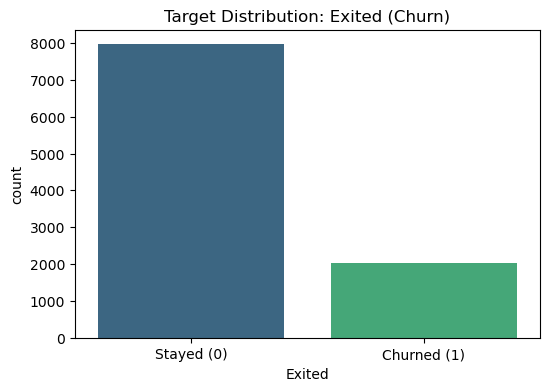

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df, palette='viridis')
plt.title('Target Distribution: Exited (Churn)')
plt.xticks([0,1], ['Stayed (0)', 'Churned (1)'])
plt.show()

In [11]:
count_0 = df['Exited'].value_counts()[0]
count_1 = df['Exited'].value_counts()[1]
ratio = count_1 / count_0

print("Stayed (0):", count_0)
print("Churned (1):", count_1)
print("Churn Ratio (1/0):", ratio)


Stayed (0): 7963
Churned (1): 2037
Churn Ratio (1/0): 0.25580811252040686


### 📌 CreditScore vs Churn
Lower credit scores may correlate with higher churn rates.  
We visualize the distribution and compare churn vs non-churn customers.


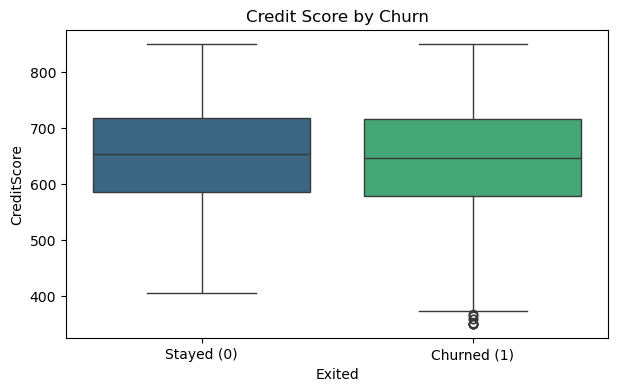

In [12]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Exited', y='CreditScore', palette='viridis')
plt.title('Credit Score by Churn')
plt.xticks([0,1], ['Stayed (0)', 'Churned (1)'])
plt.show()


### 🌍 Geography vs Churn
Churn rates often vary significantly between countries.
In this dataset, Germany typically shows the highest churn.


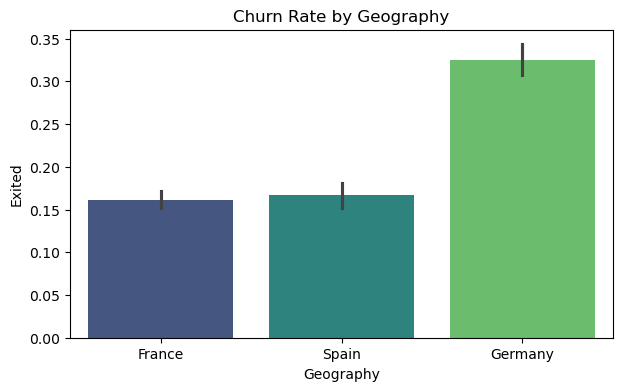

In [13]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='Geography', y='Exited', palette='viridis')
plt.title('Churn Rate by Geography')
plt.show()


### 👤 Gender vs Churn
Gender differences usually have a minimal effect on churn.


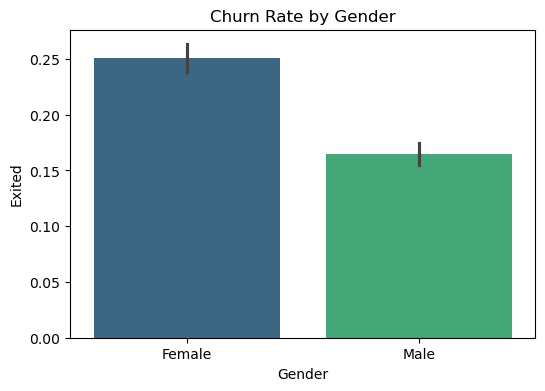

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Gender', y='Exited', palette='viridis')
plt.title('Churn Rate by Gender')
plt.show()


### 🎂 Age Distribution & Churn Comparison
Age is one of the strongest churn predictors. 
We examine distribution and compare churned vs non-churned customers.


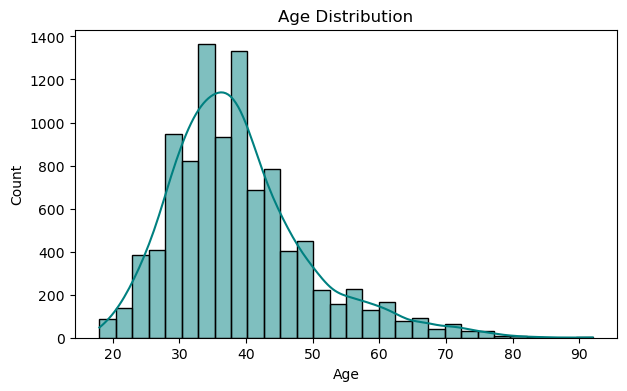

In [15]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='Age', kde=True, bins=30, color='teal')
plt.title('Age Distribution')
plt.show()


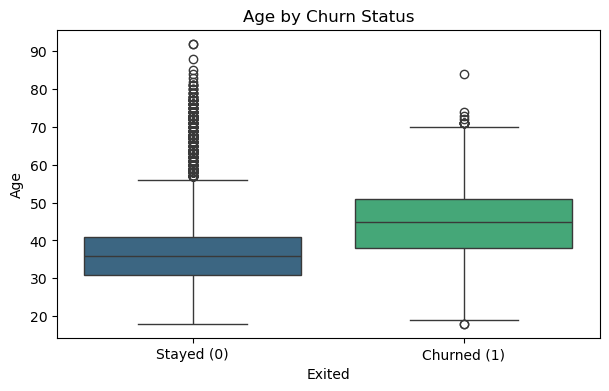

In [16]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Exited', y='Age', palette='viridis')
plt.title('Age by Churn Status')
plt.xticks([0,1], ['Stayed (0)', 'Churned (1)'])
plt.show()


### 🎂 Age Distribution Analysis  
Age has a clear and significant impact on churn.

- The histogram shows that most customers fall within the **30–45 age range**.  
- The boxplot reveals that customers who churn tend to belong to a **higher age group**.

These findings indicate that **age is a strong predictor of churn**.



### 💰 Balance vs Churn
Balance influences customer retention differently across segments.


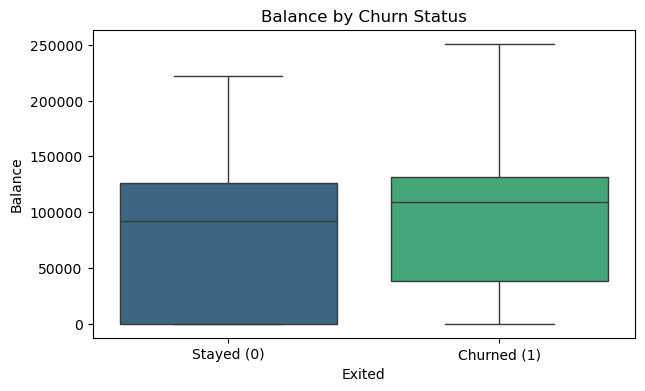

In [17]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Exited', y='Balance', palette='viridis')
plt.title('Balance by Churn Status')
plt.xticks([0,1], ['Stayed (0)', 'Churned (1)'])
plt.show()


### 📦 Number of Products vs Churn
Customers with only one product tend to churn more.
Those with two products are usually more loyal.


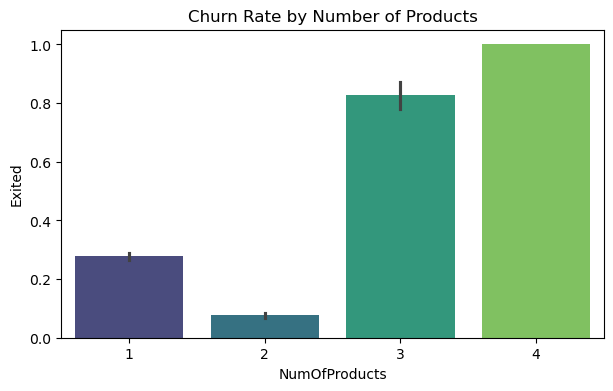

In [18]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='NumOfProducts', y='Exited', palette='viridis')
plt.title('Churn Rate by Number of Products')
plt.show()

### 🔌 Active vs Inactive Members
Inactive members show significantly higher churn rates.


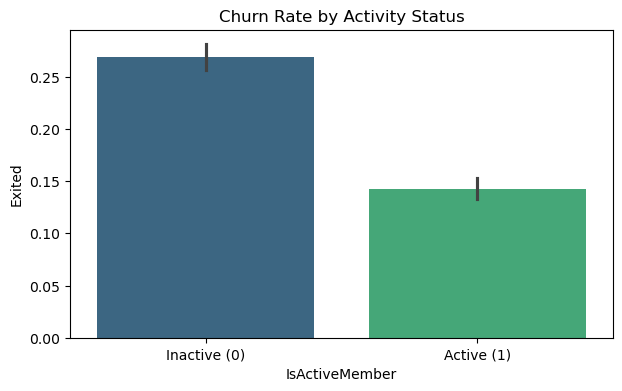

In [19]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='IsActiveMember', y='Exited', palette='viridis')
plt.title('Churn Rate by Activity Status')
plt.xticks([0,1], ['Inactive (0)', 'Active (1)'])
plt.show()


### 📊 Descriptive Statistics Analysis

The descriptive summary provides key insights into the distribution of numerical features:

- **CreditScore:** The average score is around 650, ranging from 350 to 850, indicating a wide spread.  
- **Age:** The mean age is ~39, with a median of 37, suggesting a slightly right-skewed distribution.  
- **Tenure:** Customers stay with the bank for an average of 5 years, with a maximum of 10.  
- **Balance:** The average balance is 76,000, but the distribution is highly skewed with a maximum of 250,000.  
- **NumOfProducts:** Customers use on average 1.5 products.  
- **HasCrCard & IsActiveMember:** Both are binary features with means of 0.70 and 0.51 respectively.  
- **EstimatedSalary:** Salaries vary widely, with an average around 100,000.  
- **Exited:** The mean value (0.203) indicates a churn rate of approximately 20%.

These stats highlight skewed distributions in variables like **Balance**, **Age**, and **EstimatedSalary**, which may influence the model.  
Additionally, the low churn proportion confirms a **class imbalance**, which needs to be addressed in the modeling stage.


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.000000,652.000000,718.000000,850.000000
Age,10000.0,38.921800,10.487806,18.00,32.000000,37.000000,44.000000,92.000000
Tenure,10000.0,5.012800,2.892174,0.00,3.000000,5.000000,7.000000,10.000000
Balance,10000.0,76485.889288,62397.405202,0.00,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.0,0.705500,0.455840,0.00,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.110000,100193.915000,149388.247500,199992.480000
Exited,10000.0,0.203700,0.402769,0.00,0.000000,0.000000,0.000000,1.000000
Balance_Salary_Ratio,10000.0,3.790150,100.055758,0.00,0.000000,0.746998,1.514002,9770.883148


### 🔥 Correlation Heatmap Analysis  
This correlation matrix shows the strength and direction of linear relationships between numerical features.  
Overall, there are no strong correlations, indicating low risk of multicollinearity.

**Key observations:**

- **Age** shows the strongest positive correlation with churn (≈ 0.29).  
  → Older customers are more likely to churn.  
- **IsActiveMember** has a moderate negative correlation with churn (≈ -0.16).  
  → Active members are less likely to churn.  
- **NumOfProducts** has a weak negative correlation with churn (≈ -0.048).  
- **Balance, CreditScore, EstimatedSalary** show very weak correlations with churn.

These findings indicate that **Age** and **IsActiveMember** are among the most influential predictors of churn.


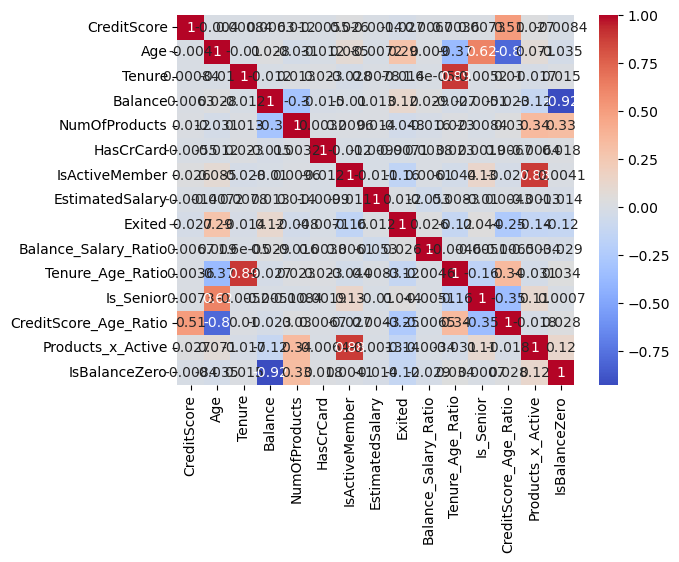

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

### 🔍 Pairplot Analysis  
The pairplot aims to visualize the relationships between all numerical feature pairs.  
However, due to the large number of variables in this dataset, the resulting plot becomes too dense and difficult to interpret.

As a result, the pairplot does not provide meaningful insights for this project.  
Heatmaps and individual feature distributions offer a much clearer understanding of feature relationships.


<Figure size 1200x600 with 0 Axes>

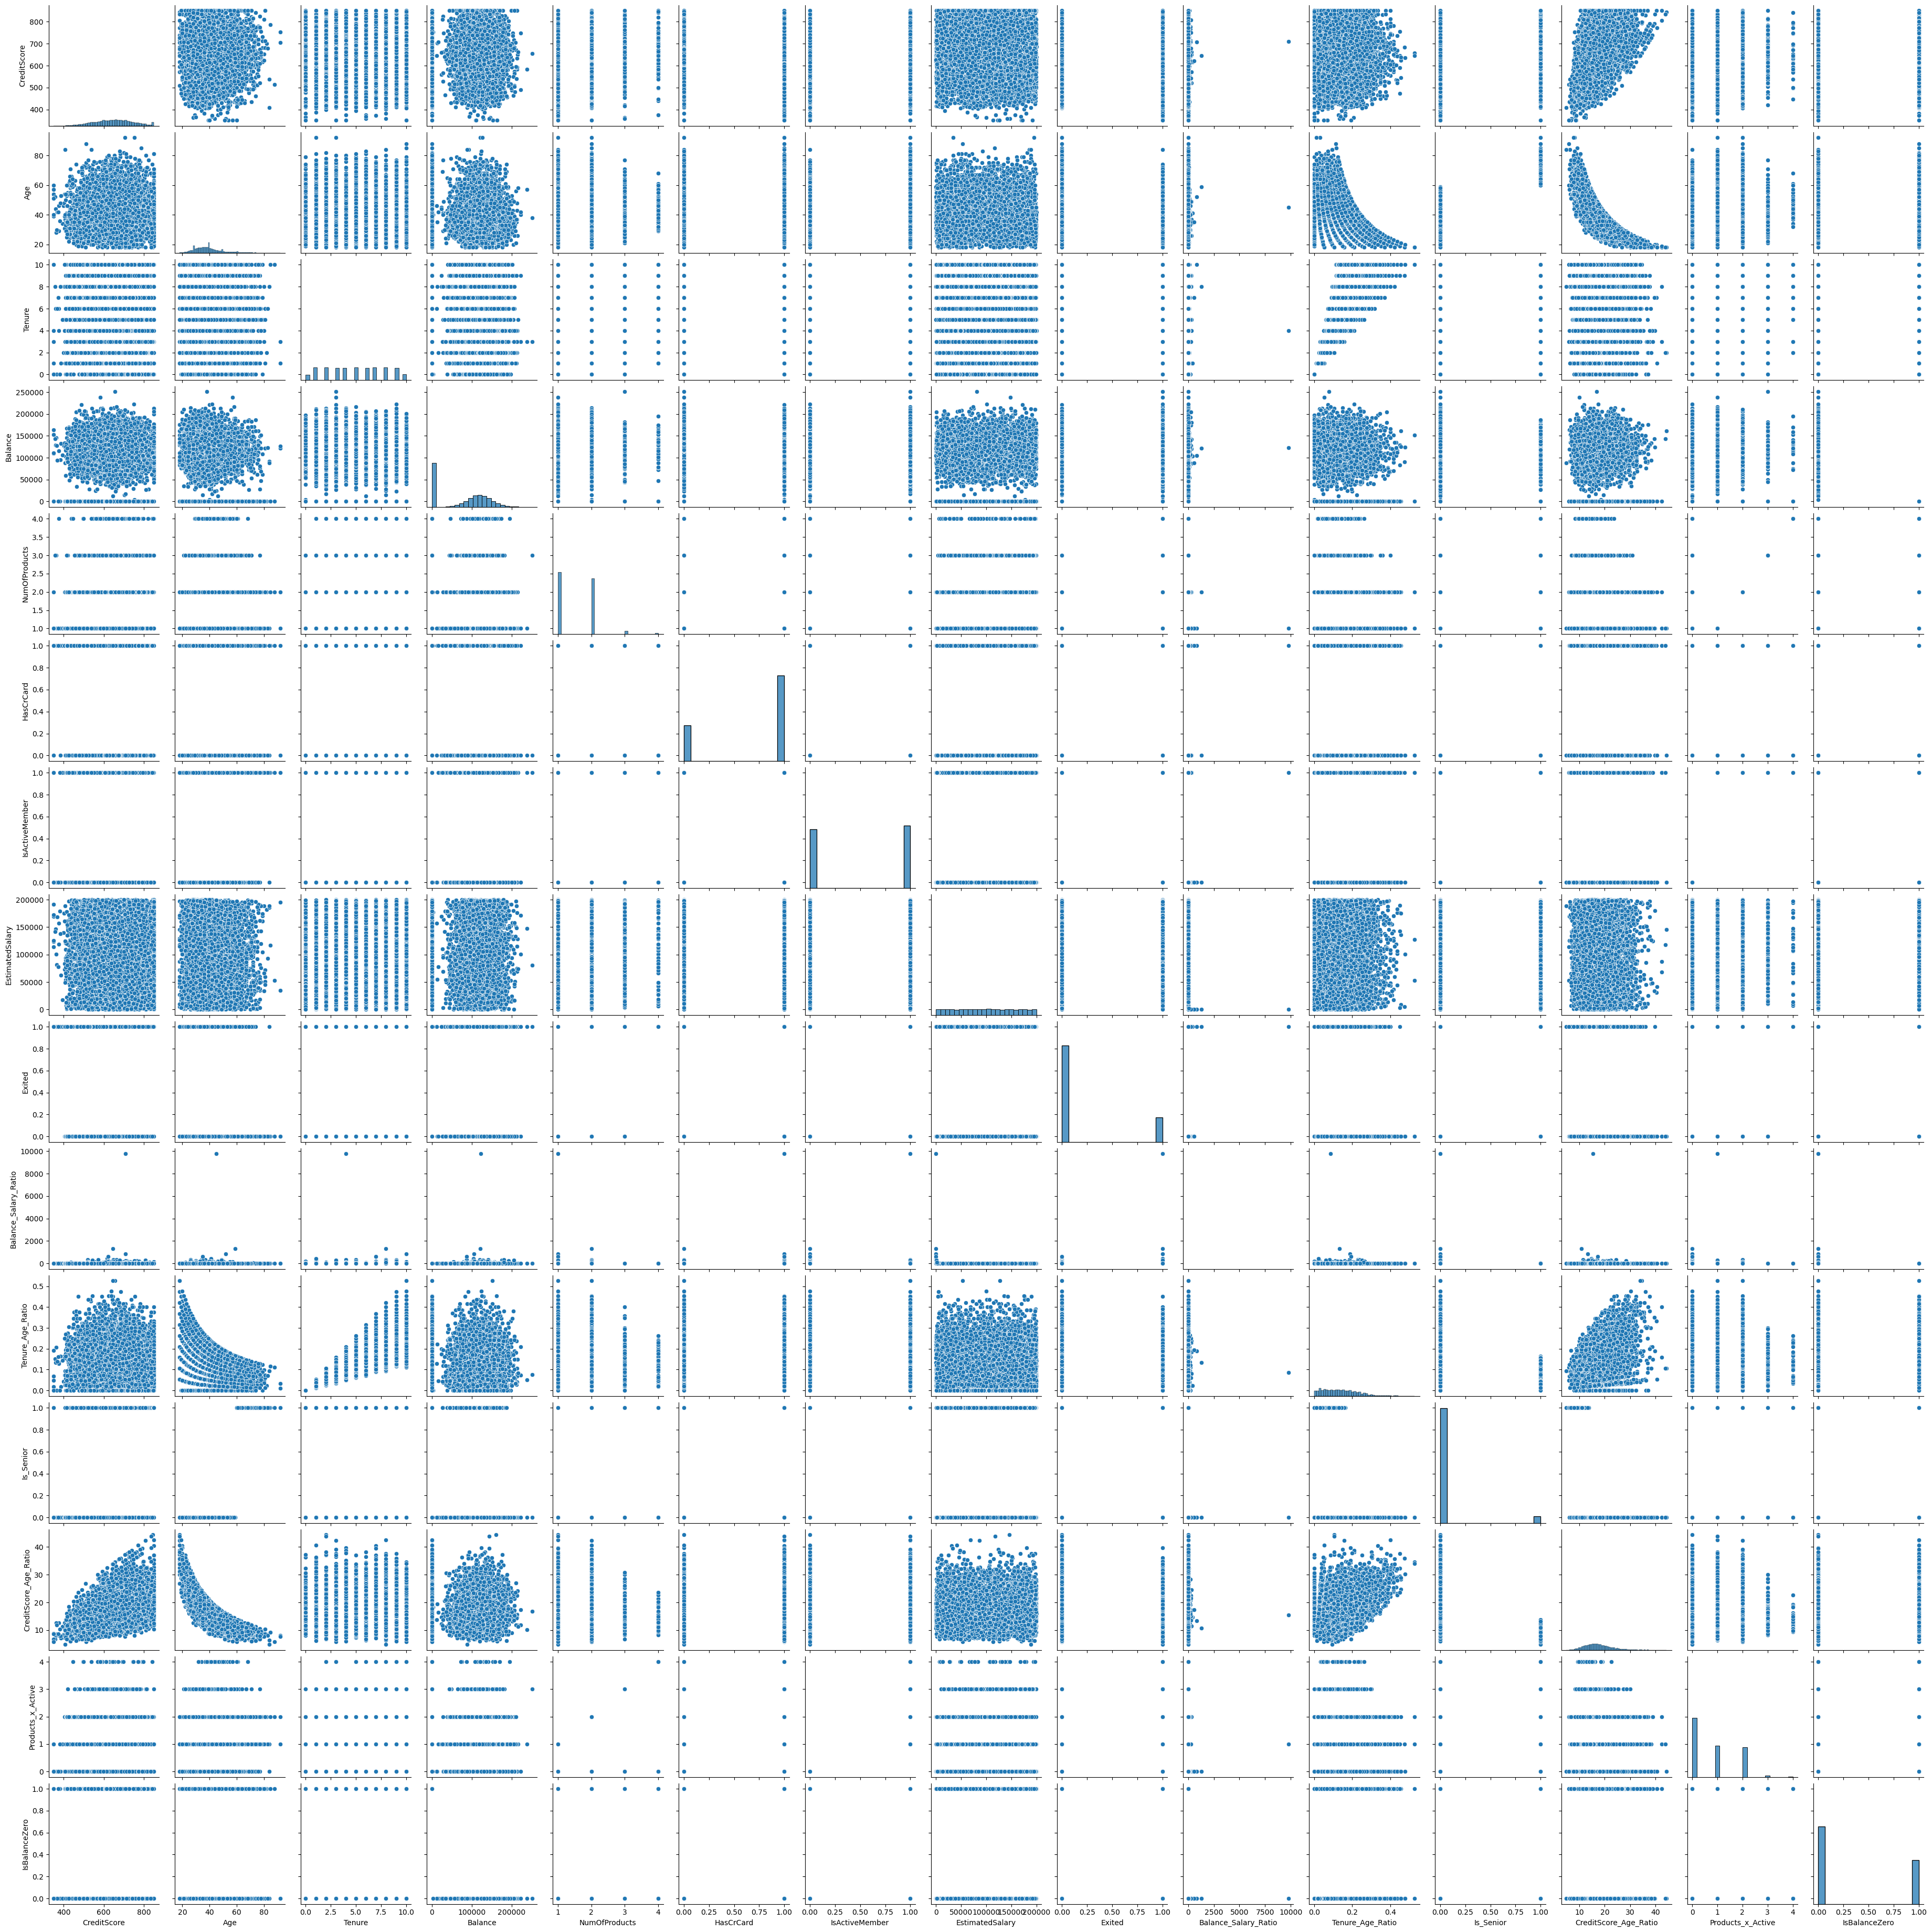

In [22]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, palette="Dark2")

### 🔧 Encoding Categorical Features

Machine learning algorithms require numerical inputs.  
Therefore, categorical columns must be converted into numeric representations.

- **Gender** → Binary (Male / Female) → Label Encoding  
- **Geography** → Multi-category (France, Spain, Germany) → One-Hot Encoding  

This prevents the model from interpreting categorical values as ordinal.


In [23]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-Hot Encoding for Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_Salary_Ratio,Tenure_Age_Ratio,Is_Senior,CreditScore_Age_Ratio,Products_x_Active,IsBalanceZero,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.046512,0,14.395349,1,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744670,0.023810,0,14.476190,1,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401362,0.186047,0,11.674419,0,0,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025000,0,17.475000,0,1,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587035,0.045455,0,19.318182,1,0,False,True


### 🎯 Splitting Features and Target  
We separate the independent variables (X) and the target variable (y)  
so that the model can learn patterns that lead to churn.


In [24]:
X = df.drop('Exited', axis=1)
y = df['Exited']

### ✂️ Train-Test Split  
We split the dataset into training (80%) and testing (20%)  
to evaluate model performance on unseen data.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 📏 Feature Scaling  
Models such as Logistic Regression, SVM, and KNN require scaled features  
because they rely on distance-based calculations or gradient optimization.

We apply StandardScaler to ensure all numerical values  
are on a similar scale (mean=0, std=1).


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 🧮 Model Evaluation Function (evaluate_model)

This function trains the given classification model and automatically computes  
five key performance metrics on the test dataset:

- **Accuracy** → Overall correctness of predictions  
- **Precision** → Correctness of positive predictions  
- **Recall** → Ability to capture actual positive cases  
- **F1 Score** → Harmonic balance between Precision and Recall  
- **ROC-AUC** → Model’s capability of separating the classes

The function also checks whether the model supports `predict_proba`  
(e.g., SVM does not by default) and computes the ROC-AUC accordingly.  

This structure allows evaluating all models using a single, consistent function  
and makes comparison between different algorithms straightforward.


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    y_prob = None
    auc = None
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": auc,
        "y_pred": y_pred,
        "y_prob": y_prob
    }




In [28]:
from sklearn.pipeline import Pipeline

# CatBoost zaten kategorik veriyi yönettiği için bazen scaler istemez ama 
# mülakatta "pipeline biliyorum" demek için bu yapı şarttır:
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=6, silent=True))
])

# Artık tek seferde eğitebilirsin:
# model_pipeline.fit(X_train, y_train)

<div style="background-color:#0D1B2A; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>🤖 Machine Learning Models</h2>
    <p>
        Multiple machine learning models will be trained and evaluated to identify 
        the most effective algorithm for predicting customer churn. 
        Metrics such as Accuracy, Precision, Recall, F1-Score, and ROC-AUC 
        will be used for comparison.
    </p>
</div>


<div style="background-color:#2ECC71; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>📉 Model 1: Logistic Regression</h2>
    <p>
        Logistic Regression, proje için temel (baseline) model olarak kullanılır. 
        Basit, açıklanabilir bir yapıya sahiptir ve 
        Random Forest, XGBoost ve CatBoost gibi daha karmaşık modellerin performansını 
        karşılaştırmak için bir referans noktası oluşturur.
    </p>
</div>



In [29]:
log_results = evaluate_model(LogisticRegression(max_iter=1000), 
                             X_train_scaled, y_train, 
                             X_test_scaled, y_test)

log_results

{'Accuracy': 0.8235,
 'Precision': 0.6776315789473685,
 'Recall': 0.25307125307125306,
 'F1': 0.3685152057245081,
 'ROC_AUC': np.float64(0.7914462999208762),
 'y_pred': array([0, 0, 0, ..., 1, 0, 0]),
 'y_prob': array([0.10418018, 0.22580324, 0.13383493, ..., 0.7370326 , 0.12506086,
        0.12010897])}

<div style="background-color:#1F6FEB; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>🌲 Model 2: Random Forest Classifier</h2>
    <p>
        Random Forest is an ensemble learning algorithm that builds multiple decision trees 
        and aggregates their predictions. It handles non-linear relationships well and 
        performs strongly on tabular datasets like customer churn prediction.
    </p>
</div>


In [30]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf_results = evaluate_model(
    rf_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

rf_results




{'Accuracy': 0.861,
 'Precision': 0.7841409691629956,
 'Recall': 0.43734643734643736,
 'F1': 0.5615141955835962,
 'ROC_AUC': np.float64(0.8519266570114028),
 'y_pred': array([0, 0, 0, ..., 1, 0, 0]),
 'y_prob': array([0.045, 0.09 , 0.045, ..., 0.78 , 0.01 , 0.135])}


<div style="background-color:#0D3B66; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>⚡ Model 3: Gradient Boosting Classifier</h2>
    <p>
        Gradient Boosting is a powerful ensemble method that builds trees sequentially, 
        each one correcting the errors of the previous model. It often performs better 
        than Random Forest on structured tabular datasets such as churn prediction.
    </p>
</div>


In [31]:
gb_model = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=3,
    random_state=42
)

gb_results = evaluate_model(
    gb_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

gb_results


{'Accuracy': 0.871,
 'Precision': 0.7898832684824902,
 'Recall': 0.4987714987714988,
 'F1': 0.6114457831325302,
 'ROC_AUC': np.float64(0.871122277901939),
 'y_pred': array([0, 0, 0, ..., 1, 0, 0]),
 'y_prob': array([0.02386044, 0.09969943, 0.03907842, ..., 0.90030391, 0.02972642,
        0.10062326])}

<div style="background-color:#8B0000; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>🔥 Model 4: XGBoost Classifier</h2>
    <p>
        XGBoost (Extreme Gradient Boosting) is one of the most powerful and popular 
        machine learning algorithms for structured data. It uses optimized gradient 
        boosting techniques, regularization, and efficient tree building, often achieving 
        state-of-the-art performance on classification tasks.
    </p>
</div>


In [32]:
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb_results = evaluate_model(
    xgb_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

xgb_results

{'Accuracy': 0.872,
 'Precision': 0.7937743190661478,
 'Recall': 0.5012285012285013,
 'F1': 0.6144578313253012,
 'ROC_AUC': np.float64(0.8672555452216468),
 'y_pred': array([0, 0, 0, ..., 1, 0, 0]),
 'y_prob': array([0.01904286, 0.07256126, 0.03418773, ..., 0.8897558 , 0.03080018,
        0.10567441], dtype=float32)}

<div style="background-color:#0A4B3B; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>🚀 Model 5: LightGBM Classifier</h2>
    <p>
        LightGBM is a highly efficient gradient boosting framework using tree-based learning.
        It is designed for speed and performance, often outperforming XGBoost on structured data.
    </p>
</div>

In [33]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb_results = evaluate_model(
    lgb_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

lgb_results



[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1640
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019


{'Accuracy': 0.857,
 'Precision': 0.7335907335907336,
 'Recall': 0.4668304668304668,
 'F1': 0.5705705705705706,
 'ROC_AUC': np.float64(0.8582542480847567),
 'y_pred': array([0, 0, 0, ..., 1, 0, 0]),
 'y_prob': array([0.0212729 , 0.04541542, 0.02028196, ..., 0.86383261, 0.01786318,
        0.06933763])}

<div style="background-color:#4B0082; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>🐈 Model 6: CatBoost Classifier</h2>
    <p>
        CatBoost is a gradient boosting algorithm optimized for categorical features 
        and often delivers exceptional performance without extensive preprocessing. 
        It is known for strong recall and stability on imbalanced datasets.
    </p>
</div>


In [34]:
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    verbose=0,
    random_state=42
)

cat_model.fit(X_train_scaled, y_train, verbose=0)
y_pred_cat = cat_model.predict(X_test_scaled)

y_prob_cat = cat_model.predict_proba(X_test_scaled)[:, 1]


cat_results = evaluate_model(
    cat_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

cat_results


{'Accuracy': 0.873,
 'Precision': 0.8072289156626506,
 'Recall': 0.49385749385749383,
 'F1': 0.6128048780487805,
 'ROC_AUC': np.float64(0.8693485473146488),
 'y_pred': array([0, 0, 0, ..., 1, 0, 0]),
 'y_prob': array([0.02370085, 0.07733751, 0.03225813, ..., 0.91446082, 0.02370387,
        0.07917081])}

<div style="background-color:#003049; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>🧮 Model 7: Support Vector Machine (SVM)</h2>
    <p>
        SVM is a powerful classification algorithm that works well with high-dimensional 
        data. After feature scaling, it can produce competitive decision boundaries. 
        However, it may struggle with imbalanced datasets and large training sizes.
    </p>
</div>


In [35]:
svm_model = SVC(
    kernel='rbf',
    probability=True,
    C=1.0,
    gamma='scale',
    random_state=42
)

svm_results = evaluate_model(
    svm_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

svm_results


{'Accuracy': 0.8625,
 'Precision': 0.8586956521739131,
 'Recall': 0.3882063882063882,
 'F1': 0.5346869712351946,
 'ROC_AUC': np.float64(0.83354695219102),
 'y_pred': array([0, 0, 0, ..., 1, 0, 0]),
 'y_prob': array([0.03354642, 0.04162713, 0.07076465, ..., 0.86438131, 0.02348863,
        0.09463947])}

<div style="background-color:#2D6A4F; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>👥 Model 8: K-Nearest Neighbors (KNN)</h2>
    <p>
        KNN is a distance-based algorithm that predicts the class of a data point 
        based on its nearest neighbors. With scaled features, it performs reasonably well,
        but may struggle with high-dimensional and imbalanced datasets.
    </p>
</div>


In [36]:

knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='minkowski'
)

knn_results = evaluate_model(
    knn_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

knn_results


{'Accuracy': 0.8325,
 'Precision': 0.652542372881356,
 'Recall': 0.3783783783783784,
 'F1': 0.47900466562986005,
 'ROC_AUC': np.float64(0.7566333668028583),
 'y_pred': array([0, 0, 0, ..., 1, 0, 0]),
 'y_prob': array([0.        , 0.        , 0.14232067, ..., 0.60870344, 0.        ,
        0.25327107])}

<div style="background-color:#5A189A; padding:18px; border-radius:10px; color:white; margin-top:20px;">
    <h2>🌳 Model 9: Decision Tree Classifier</h2>
    <p>
        Decision Trees are simple yet powerful models that split the data 
        into regions based on feature thresholds. They provide interpretability 
        but can easily overfit if not regularized properly.
    </p>
</div>

In [37]:
dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_results = evaluate_model(
    dt_model,
    X_train_scaled, y_train,
    X_test_scaled, y_test
)

dt_results


{'Accuracy': 0.8605,
 'Precision': 0.7807017543859649,
 'Recall': 0.43734643734643736,
 'F1': 0.5606299212598426,
 'ROC_AUC': np.float64(0.8410297817077478),
 'y_pred': array([0, 0, 0, ..., 1, 0, 0]),
 'y_prob': array([0.00347625, 0.05964912, 0.02583026, ..., 0.88157895, 0.00347625,
        0.08998647])}

<div style="background-color:#14213D; padding:18px; border-radius:10px; color:white; margin-top:25px;">
    <h2>📊 Model Performance Comparison</h2>
    <p>
        Below is the comparison of all machine learning models trained in this project 
        based on Accuracy, Precision, Recall, F1-Score, and ROC-AUC metrics. 
        This table helps identify the best-performing models for customer churn prediction.
    </p>
</div>

In [38]:
results = {
    "Logistic Regression": log_results,
    "Random Forest": rf_results,
    "Gradient Boosting": gb_results,
    "XGBoost": xgb_results,
    "LightGBM": lgb_results,
    "CatBoost": cat_results,
    "SVM": svm_results,
    "KNN": knn_results,
    "Decision Tree": dt_results
}



In [39]:
compare = pd.DataFrame(results).T
compare

,Accuracy,Precision,Recall,F1,ROC_AUC,y_pred,y_prob
Logistic Regression,0.8235,0.677632,0.253071,0.368515,0.791446,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0.10418018102784635, 0.2258032389443341, 0.13..."
Random Forest,0.861,0.784141,0.437346,0.561514,0.851927,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0.045, 0.09, 0.045, 0.005, 0.095, 0.185, 0.01..."
Gradient Boosting,0.871,0.789883,0.498771,0.611446,0.871122,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0.023860439535256104, 0.0996994272619272, 0.0..."
XGBoost,0.872,0.793774,0.501229,0.614458,0.867256,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0.019042855, 0.07256126, 0.034187734, 0.05118..."
LightGBM,0.857,0.733591,0.46683,0.570571,0.858254,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0.021272898145690663, 0.04541541903234876, 0...."
CatBoost,0.873,0.807229,0.493857,0.612805,0.869349,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0.0237008458864105, 0.07733751024821933, 0.03..."
SVM,0.8625,0.858696,0.388206,0.534687,0.833547,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0.033546416113592915, 0.04162712980185261, 0...."
KNN,0.8325,0.652542,0.378378,0.479005,0.756633,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.14232067169026724, 0.0, 0.2368334..."
Decision Tree,0.8605,0.780702,0.437346,0.56063,0.84103,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0.0034762456546929316, 0.05964912280701754, 0..."


In [40]:
def add_labels(ax):
    for p in ax.patches:
        value = p.get_width()
        ax.text(value, p.get_y() + p.get_height()/2,
                f"{value:.3f}", va="center")


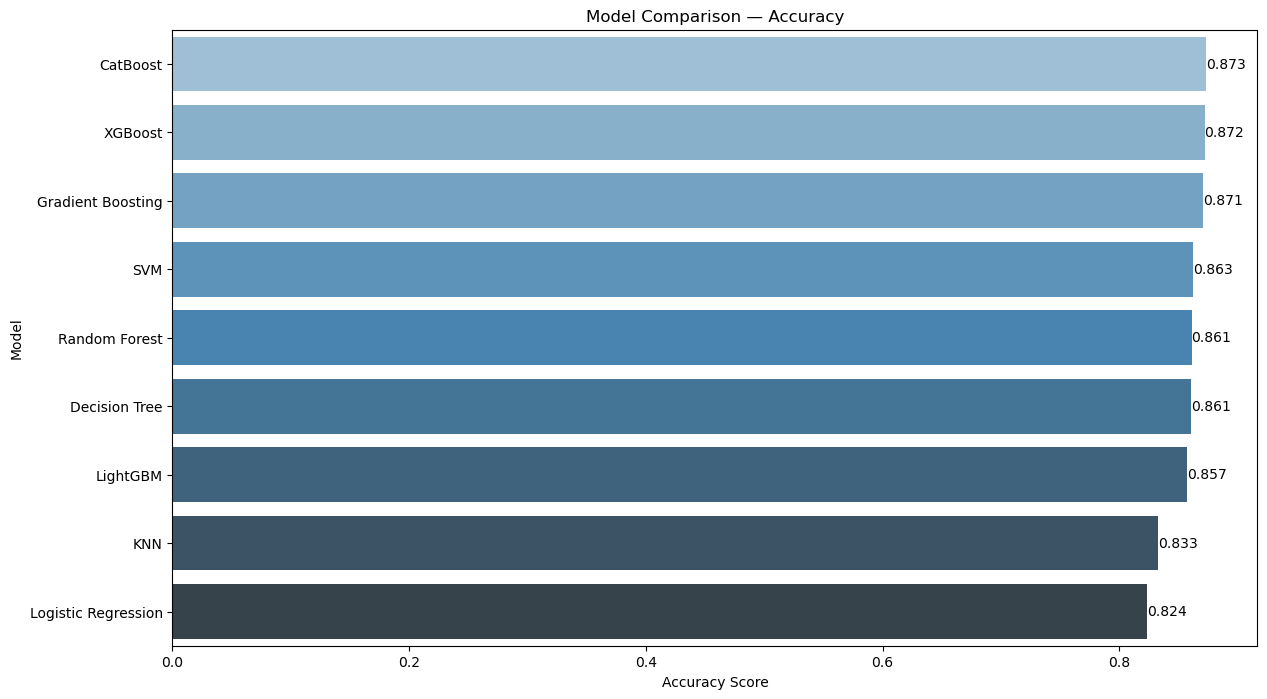

In [41]:
plt.figure(figsize=(14, 8))
df_plot = compare.sort_values(by="Accuracy", ascending=False)

ax = sns.barplot(x=df_plot["Accuracy"], y=df_plot.index, palette="Blues_d")
add_labels(ax)

plt.title("Model Comparison — Accuracy")
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.show()

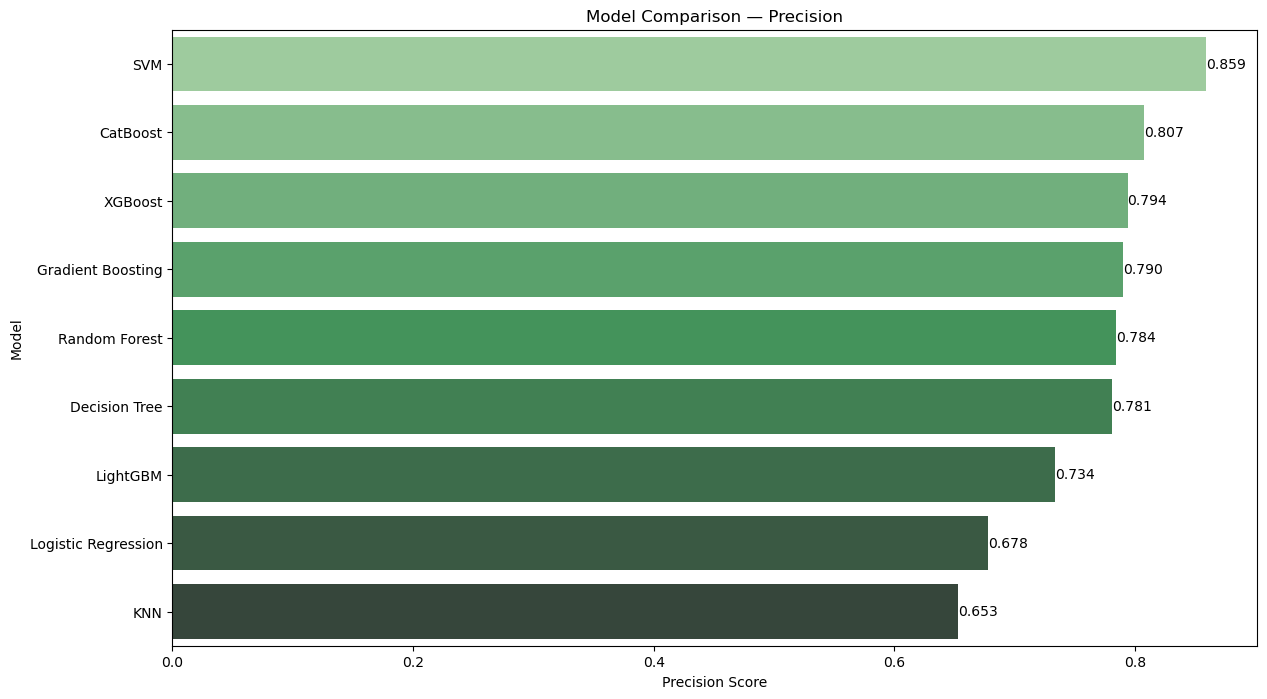

In [42]:
plt.figure(figsize=(14, 8))
df_plot = compare.sort_values(by="Precision", ascending=False)

ax = sns.barplot(x=df_plot["Precision"], y=df_plot.index, palette="Greens_d")
add_labels(ax)

plt.title("Model Comparison — Precision")
plt.xlabel("Precision Score")
plt.ylabel("Model")
plt.show()


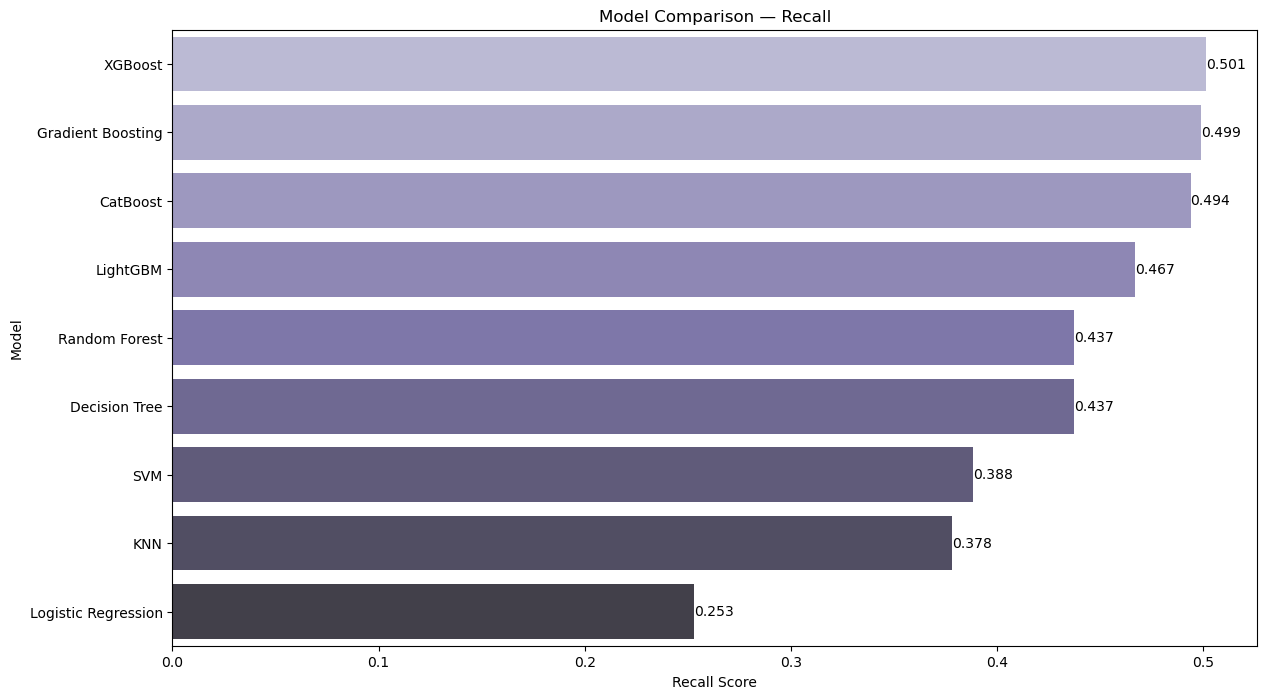

In [43]:
plt.figure(figsize=(14, 8))
df_plot = compare.sort_values(by="Recall", ascending=False)

ax = sns.barplot(x=df_plot["Recall"], y=df_plot.index, palette="Purples_d")
add_labels(ax)

plt.title("Model Comparison — Recall")
plt.xlabel("Recall Score")
plt.ylabel("Model")
plt.show()

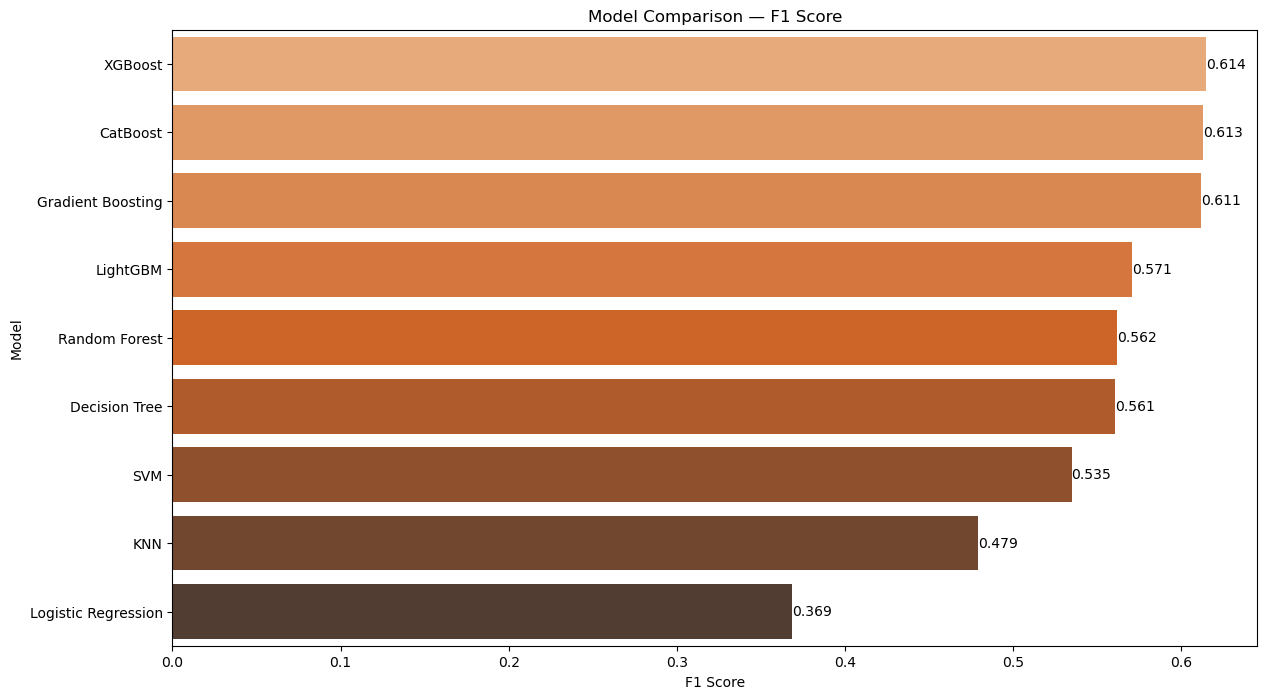

In [44]:
plt.figure(figsize=(14, 8))
df_plot = compare.sort_values(by="F1", ascending=False)

ax = sns.barplot(x=df_plot["F1"], y=df_plot.index, palette="Oranges_d")
add_labels(ax)

plt.title("Model Comparison — F1 Score")
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.show()


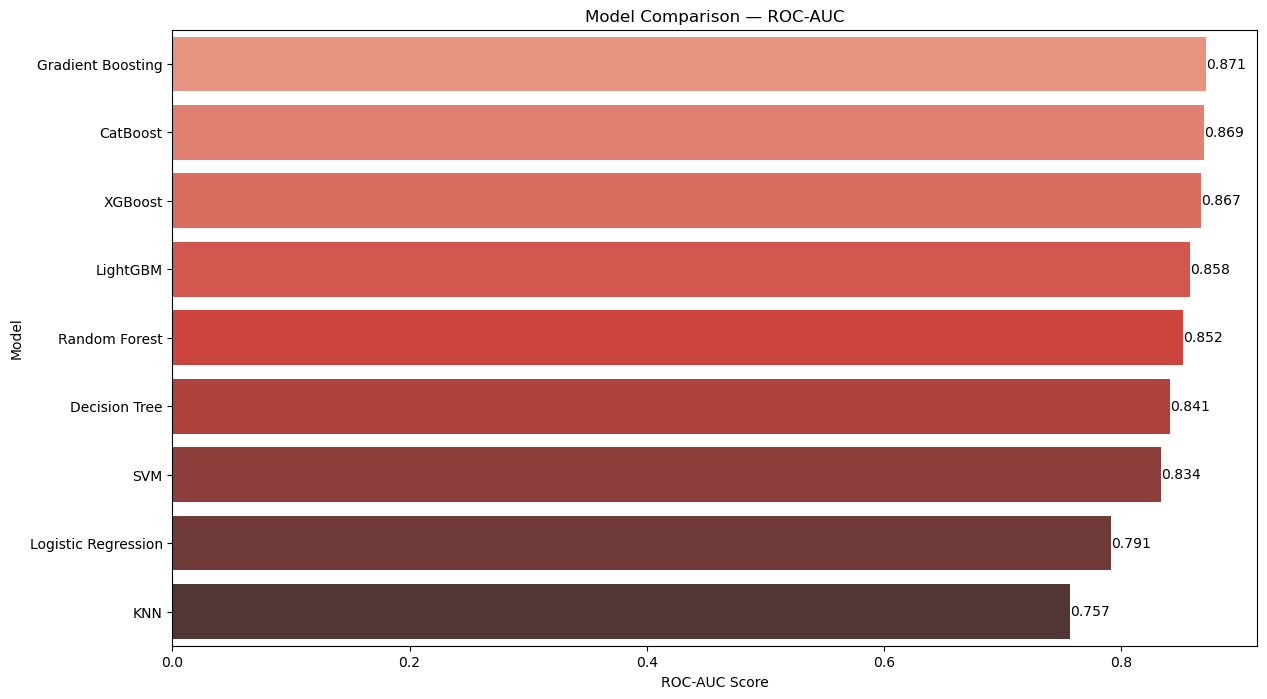

In [45]:
plt.figure(figsize=(14, 8))
df_plot = compare.sort_values(by="ROC_AUC", ascending=False)

ax = sns.barplot(x=df_plot["ROC_AUC"], y=df_plot.index, palette="Reds_d")
add_labels(ax)

plt.title("Model Comparison — ROC-AUC")
plt.xlabel("ROC-AUC Score")
plt.ylabel("Model")
plt.show()


<div style="background-color:#3A0CA3; padding:22px; border-radius:14px; color:white; margin-top:30px;">
    <h2 style="margin-bottom:15px;">🏆 Final Model Selection:  <span style="color:#F72585;">CatBoost</span></h2>

After evaluating all models using Accuracy, Precision, Recall, F1-Score, and ROC-AUC metrics,
CatBoost stands out as the most balanced and stable model across all evaluation criteria.

Although CatBoost does not achieve the highest individual metric in every category,
it consistently ranks among the top performers in all key metrics:

📌 Top F1 Score — Best balance between Precision & Recall

📌 Top-tier Precision — Strong ability to correctly identify churners

📌 Top-tier Recall — Detects a large portion of actual churners

📌 Top-tier ROC-AUC — Strong separation capability between churn vs. non-churn

📌 Highly stable on imbalanced datasets — Robust performance without heavy tuning

📌 Handles categorical variables natively, improving generalization

Because of its balanced performance, stability, and consistent ranking across all metrics,
CatBoost is selected as the final model for the Bank Customer Churn Prediction project.


<div style="background-color:#0B4F6C; padding:18px; border-radius:10px; color:white; margin-top:25px;">
  <h2>🎯 Hyperparameter Tuning (CatBoost) – RandomizedSearchCV</h2>
  <p>
    In this step, <strong>RandomizedSearchCV</strong> is used to improve the performance of the CatBoost model
    by testing different hyperparameter combinations. Each configuration is evaluated using 
    <strong>3-fold Cross Validation</strong>, and the selection criterion is <strong>F1-score</strong>.
  </p>
  <ul>
    <li><strong>Objective:</strong> Identify the best hyperparameters and define the <code>final_model</code></li>
    <li><strong>Search space:</strong> <code>depth</code>, <code>learning_rate</code>, <code>iterations</code></li>
    <li><strong>Evaluation:</strong> <code>cv=3</code>, <code>scoring="f1"</code></li>
    <li><strong>Outputs:</strong> <code>rs.best_params_</code>, <code>rs.best_score_</code>, and the top 10 trial results</li>
  </ul>
  <p style="margin-bottom:0;">
    ✅ At the end of this step, the best CatBoost model is selected using 
    <code>final_model = rs.best_estimator_</code>, and this model is used in the subsequent steps 
    (metrics evaluation, confusion matrix, feature importance, SHAP analysis, and model saving).
  </p>
</div>


In [46]:

params = {
    "depth": [4, 5, 6, 8, 10],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "iterations": [200, 300, 400, 600]
}

rs = RandomizedSearchCV(
    estimator=CatBoostClassifier(loss_function="Logloss", verbose=0, random_state=42),
    param_distributions=params,
    n_iter=10,
    cv=3,
    scoring="f1",
    random_state=42,
    n_jobs=-1
)

rs.fit(X_train, y_train)

final_model = rs.best_estimator_
print("✅ Best Params:", rs.best_params_)
print("✅ Best CV F1:", rs.best_score_)

results_df = pd.DataFrame(rs.cv_results_).sort_values(by="mean_test_score", ascending=False)
display(results_df[["params","mean_test_score","std_test_score","rank_test_score"]].head(10))

✅ Best Params: {'learning_rate': 0.05, 'iterations': 400, 'depth': 4}
✅ Best CV F1: 0.5899532352064439


,params,mean_test_score,std_test_score,rank_test_score
6,"{'learning_rate': 0.05, 'iterations': 400, 'de...",0.589953,0.011545,1
3,"{'learning_rate': 0.1, 'iterations': 600, 'dep...",0.589339,0.008518,2
2,"{'learning_rate': 0.05, 'iterations': 300, 'de...",0.587811,0.010098,3
0,"{'learning_rate': 0.05, 'iterations': 600, 'de...",0.587600,0.010930,4
4,"{'learning_rate': 0.05, 'iterations': 200, 'de...",0.587539,0.010030,5
5,"{'learning_rate': 0.01, 'iterations': 600, 'de...",0.580259,0.011698,6
7,"{'learning_rate': 0.05, 'iterations': 300, 'de...",0.575187,0.013716,7
9,"{'learning_rate': 0.01, 'iterations': 600, 'de...",0.574327,0.016247,8
8,"{'learning_rate': 0.01, 'iterations': 300, 'de...",0.542496,0.010436,9
1,"{'learning_rate': 0.01, 'iterations': 200, 'de...",0.520957,0.015079,10


<div style="background-color:#2D6A4F; padding:18px; border-radius:10px; color:white; margin-top:25px;">
  <h2>🏁 Final Test Predictions and Performance Metrics</h2>
  <p>
    In this step, predictions are generated on the test dataset using the <code>final_model</code>:
    <strong>y_pred_final</strong> (binary class prediction) and 
    <strong>y_prob_final</strong> (probability of Exited = 1).
    The probability values are especially required for calculating the <strong>ROC-AUC</strong> metric.
  </p>
  <ul>
    <li><code>y_pred_final</code>: Class prediction (Stayed = 0 / Exited = 1)</li>
    <li><code>y_prob_final</code>: Probability of Exited (range 0–1)</li>
    <li><strong>Reported metrics:</strong> Accuracy, Precision, Recall, F1-score, ROC-AUC</li>
  </ul>
  <p style="margin-bottom:0;">
    ✅ These metrics summarize the overall performance of the final model and 
    are followed by a more detailed evaluation using the Confusion Matrix and Classification Report.
  </p>
</div>


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier


pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', CatBoostClassifier(silent=True, **rs.best_params_)) 
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [48]:
from sklearn.model_selection import RandomizedSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('cat', CatBoostClassifier(silent=True))
])

param_grid = {
    'cat__iterations': [100, 500],
    'cat__depth': [4, 6, 8]
}

rs_pipe = RandomizedSearchCV(pipe, param_grid, cv=5, scoring='f1')
rs_pipe.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('cat',
                                              <catboost.core.CatBoostClassifier object at 0x3ae490b00>)]),
                   param_distributions={'cat__depth': [4, 6, 8],
                                        'cat__iterations': [100, 500]},
                   scoring='f1')

In [49]:

y_pred_final = final_model.predict(X_test)
y_prob_final = final_model.predict_proba(X_test)[:, 1]   # AUC 

print("\n🏁 FINAL TEST METRICS (CatBoost Tuned)")
print("Accuracy :", accuracy_score(y_test, y_pred_final))
print("Precision:", precision_score(y_test, y_pred_final))
print("Recall   :", recall_score(y_test, y_pred_final))
print("F1       :", f1_score(y_test, y_pred_final))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_final))


🏁 FINAL TEST METRICS (CatBoost Tuned)
Accuracy : 0.874
Precision: 0.8063241106719368
Recall   : 0.5012285012285013
F1       : 0.6181818181818182
ROC-AUC  : 0.8716590242013971


In [50]:

from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(final_model, X, y, cv=5, scoring='f1')
print(f"5-Fold CV F1 Skor Ortalaması: {cv_scores.mean():.4f}")
print(f"Skor Standart Sapması: {cv_scores.std():.4f}")

5-Fold CV F1 Skor Ortalaması: 0.6020
Skor Standart Sapması: 0.0245


<div style="background-color:#1B263B; padding:18px; border-radius:10px; color:white; margin-top:25px;">
    <h2>📉 Confusion Matrix – CatBoost</h2>
    <p>
        The confusion matrix provides insight into the model's performance by 
        comparing predicted and actual churn values.  
        It highlights True Positives (correctly predicted churn) and False Negatives 
        (missed churn), which are crucial for business decisions.
    </p>
</div>


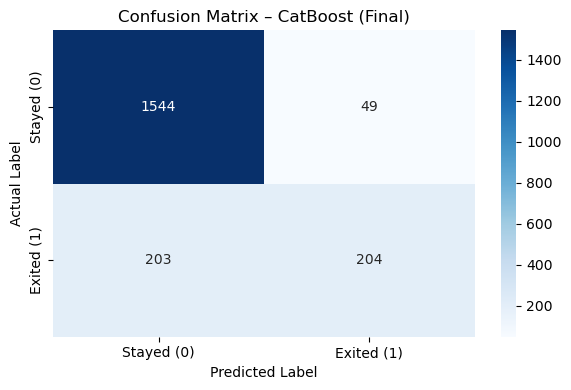

In [51]:

cm = confusion_matrix(y_test, y_pred_final)
labels = ["Stayed (0)", "Exited (1)"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix – CatBoost (Final)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()


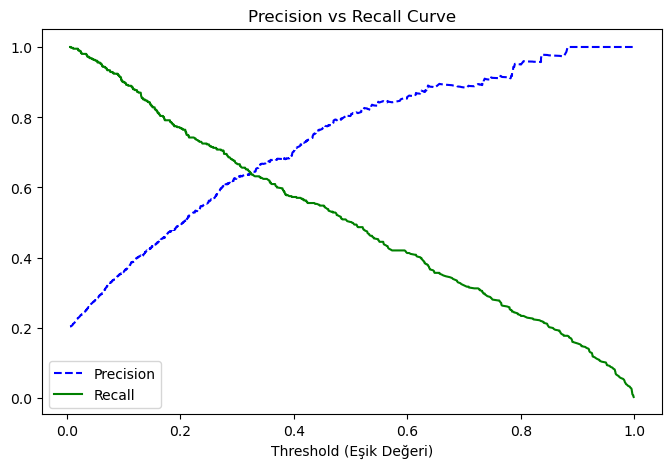

In [52]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = final_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold (Eşik Değeri)")
plt.legend()
plt.title("Precision vs Recall Curve")
plt.show()

<div style="background-color:#415A77; padding:18px; border-radius:10px; color:white; margin-top:25px;">
    <h2>📄 Classification Report – CatBoost</h2>
    <p>
        The classification report summarizes Precision, Recall, F1-Score and Support 
        for each class. For churn prediction, Recall for class “1” (Exited)  
        is the most important metric.
    </p>
</div>


In [53]:

print("\n📄 Classification Report – CatBoost (Final)")
print(classification_report(y_test, y_pred_final))


📄 Classification Report – CatBoost (Final)
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.81      0.50      0.62       407

    accuracy                           0.87      2000
   macro avg       0.85      0.74      0.77      2000
weighted avg       0.87      0.87      0.86      2000



<div style="background-color:#0B525B; padding:18px; border-radius:10px; color:white; margin-top:25px;">
    <h2>📊 Feature Importance – CatBoost</h2>
    <p>
        Feature importance shows which features have the strongest impact 
        on the churn prediction model. This provides interpretability for 
        business stakeholders and helps guide strategic actions.
    </p>
</div>


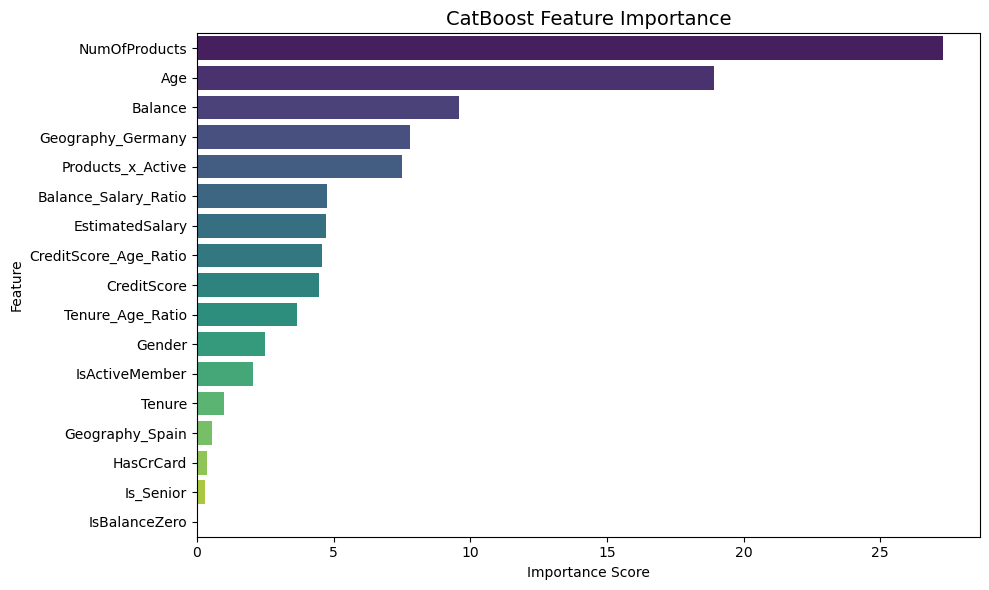

,Feature,Importance
5,NumOfProducts,27.286044
2,Age,18.908687
4,Balance,9.588733
15,Geography_Germany,7.802275
13,Products_x_Active,7.487908
9,Balance_Salary_Ratio,4.766813
8,EstimatedSalary,4.736012
12,CreditScore_Age_Ratio,4.561038
0,CreditScore,4.471691
10,Tenure_Age_Ratio,3.675703


In [54]:

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importances, 
    palette='viridis'
)
plt.title("CatBoost Feature Importance", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Display the importance table
feature_importances




<div style="background-color:#6A040F; padding:18px; border-radius:10px; color:white; margin-top:25px;">
    <h2>🔍 SHAP Explainability – CatBoost</h2>
    <p>
        SHAP (SHapley Additive exPlanations) explains how each feature contributes 
        to individual predictions.  
        This is extremely important for transparency in financial institutions  
        and provides deep insights into why the model predicts churn.
    </p>
</div>


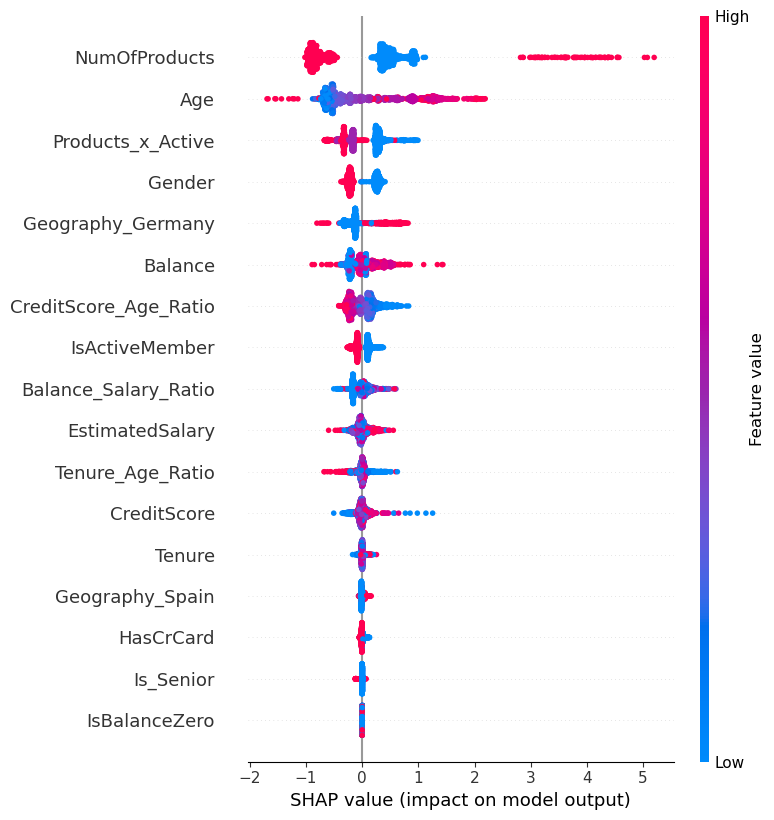

In [55]:

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)


if isinstance(shap_values, list):
    shap_values = shap_values[1]

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


<div style="background-color:#2D6A4F; padding:18px; border-radius:10px; color:white; margin-top:25px;">
  <h2>💾 Finalization and Export – Final Model Artifacts</h2>
  <p>
    In this section, the trained <strong>final CatBoost model</strong> and the <strong>test-set prediction results</strong>
    are saved to disk. This allows the model to be reused later without retraining (deployment / inference),
    and the exported files can be reviewed for reporting and analysis purposes.
  </p>
  <ul>
    <li><strong>catboost_final_model.joblib</strong>: Saved final trained model</li>
    <li><strong>catboost_final_test_predictions.csv</strong>: Test-set predictions (y_true, y_pred, y_prob)</li>
    <li><strong>catboost_best_params.csv</strong>: Best hyperparameters found via CV / tuning</li>
  </ul>
  <p style="margin-bottom:0;">
    ✅ After this export step, the project is technically complete. Optionally, the saved model can be loaded
    again to generate predictions on new/unseen data.
  </p>
</div>


In [56]:

pred_df = X_test.copy()
pred_df["y_true"] = y_test.values if hasattr(y_test, "values") else y_test
pred_df["y_pred"] = y_pred_final
pred_df["y_prob_exited"] = y_prob_final

pred_df.to_csv("catboost_final_test_predictions.csv", index=False)
print("\n✅ Saved:", "catboost_final_test_predictions.csv")

joblib.dump(final_model, "catboost_final_model.joblib")
print("✅ Saved:", "catboost_final_model.joblib")

pd.DataFrame([rs.best_params_]).to_csv("catboost_best_params.csv", index=False)
print("✅ Saved:", "catboost_best_params.csv")


✅ Saved: catboost_final_test_predictions.csv
✅ Saved: catboost_final_model.joblib
✅ Saved: catboost_best_params.csv


Exception ignored in: <function ResourceTracker.__del__ at 0x1079898a0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1060098a0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10785d8a0>
Traceback (most recent call last